# Iterated Prisoner's Dilemma: Tutorial

Here we will use another python package to explore the Iterated Prisoner's Dilemma. Documentation for AxelRod: https://axelrod.readthedocs.io/en/stable/


In [3]:
pip install axelrod

     |████████████████████████████████| 174kB 4.9MB/s 


In [0]:
# Creates a match between two players.
import axelrod as axl
players = (axl.Alternator(), axl.TitForTat())
match = axl.Match(players, 5)
interactions = match.play()
mp = axl.MoranProcess(players)

for row in mp.score_history:
        print([round(element, 1) for element in row])

In [0]:
import axelrod as axl
players = (axl.Defector(), axl.Cooperator())
match = axl.Match(players, 5)
interactions = match.play()
mp = axl.MoranProcess(players)
for row in mp.score_history:
    print([round(element, 1) for element in row])

Analysing: 100%|██████████| 25/25 [00:00<00:00, 147.20it/s]


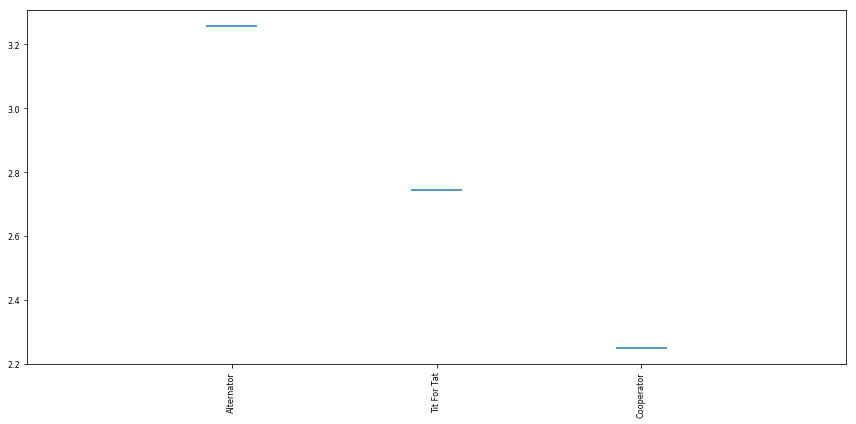

In [0]:
# Create a tournament
import axelrod as axl
players = (axl.Cooperator(), axl.Alternator(), axl.TitForTat())
tournament = axl.Tournament(players)
results = tournament.play()
results.ranked_names

plot = axl.Plot(results) 
p = plot.boxplot()
p.show()

In [0]:
# Study the evolution using a Moran Process (to be defined)
import axelrod as axl
players = (axl.Cooperator(), axl.Alternator(), axl.TitForTat())
mp = axl.MoranProcess(players)
populations = mp.play()
populations  
print(len(mp)) # Number of rounds
print(mp.winning_strategy_name)

14
Alternator


In [0]:
# We can also show the results of each round

for row in mp.score_history:
    print([round(element, 1) for element in row])

[4.5, 6.5, 5.5]
[4.5, 4.5, 5.0]
[4.5, 4.5, 5.0]
[4.5, 4.5, 5.0]
[4.5, 4.5, 5.0]
[5.0, 5.5, 5.5]
[4.5, 4.5, 5.0]
[5.0, 5.5, 5.5]
[5.0, 5.5, 5.5]
[5.0, 5.5, 5.5]
[4.5, 5.0, 4.5]
[4.5, 5.0, 4.5]
[4.5, 5.0, 4.5]


Tit For Tat


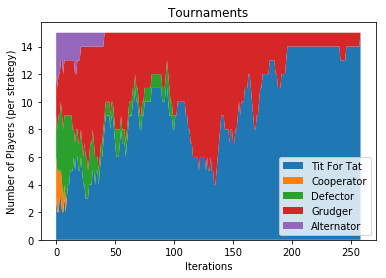

In [0]:

import axelrod as axl
import random
import matplotlib.pyplot as plt

axl.seed(15)  # for reproducible example
players = [axl.TitForTat(), axl.TitForTat(), axl.TitForTat(), axl.Cooperator(), axl.Cooperator(), axl.Cooperator(), axl.Defector(), axl.Defector(), axl.Defector(),
           axl.Grudger(), axl.Grudger(), axl.Grudger(), axl.Alternator(), axl.Alternator(), axl.Alternator()]
mp = axl.MoranProcess(players=players, turns=100)
populations = mp.play()
print(mp.winning_strategy_name)

ax = mp.populations_plot()
plt.title('Tournaments')
plt.xlabel('Iterations')
plt.ylabel('Number of Players (per strategy)')
plt.legend(loc = 'lower right')
plt.show()  

What happens if we change the fitness formulation for our Moran Process?



Defector
Defector


Text(0.5, 1.0, 'Tournament Results, w = 0.8')

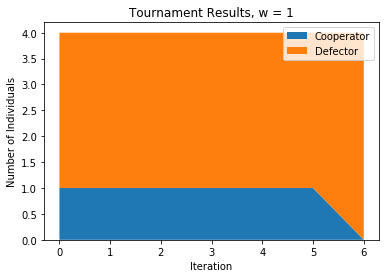

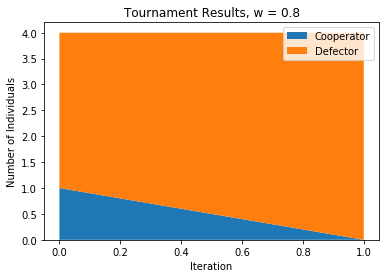

In [25]:
import axelrod as axl
import matplotlib.pyplot as plt

# We set a seed to make sure our results are reproducible
axl.seed(689)

# Our players are 1 cooperator and 3 defectors
players = (axl.Cooperator(), axl.Defector(), axl.Defector(), axl.Defector())

# Alter the fitness function (probability of success)
w = 0.1
fitness_transformation = lambda score: 1 - w + w * score

# Set-up tournament
mp = axl.MoranProcess(players=players, turns=10)
mp_newfit = axl.MoranProcess(players=players, turns=10, fitness_transformation = fitness_transformation)

# Simulate tournament
populations = mp.play()
populations_mp = mp_newfit.play()

# Print the winning stategy
print(mp.winning_strategy_name)
print(mp_newfit.winning_strategy_name)

# Plot results 
plot= mp.populations_plot()
plt.title('Tournament Results, w = 1')

plot_newfit = mp_newfit.populations_plot() 
plt.title('Tournament Results, w = 0.8')

We see that using a different fitness formulation could lead to a different outcome.